#  Lending Club Loan Data Analysis

### Create a model that predicts whether or not a loan will be default using the historical data.

In [1]:
# import necessory librarys

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("All library importted")

All library importted


In [3]:
# load the dataset
df = pd.read_csv("loan_data.csv")

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.shape

(9578, 14)

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
#missing values
df.isna().sum().any()

False

In [8]:
df['not.fully.paid'].value_counts()
# 0- means fully paid , 1-means not paid
# my observation is imbalance data

0    8045
1    1533
Name: not.fully.paid, dtype: int64

###  Exploratory data analysis of different factors of the dataset.

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


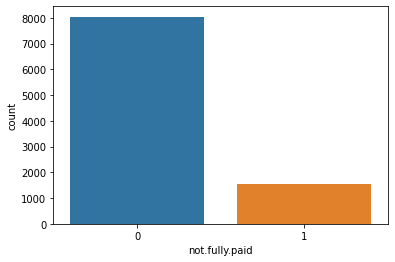

In [9]:
sns.countplot(df['not.fully.paid'])
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


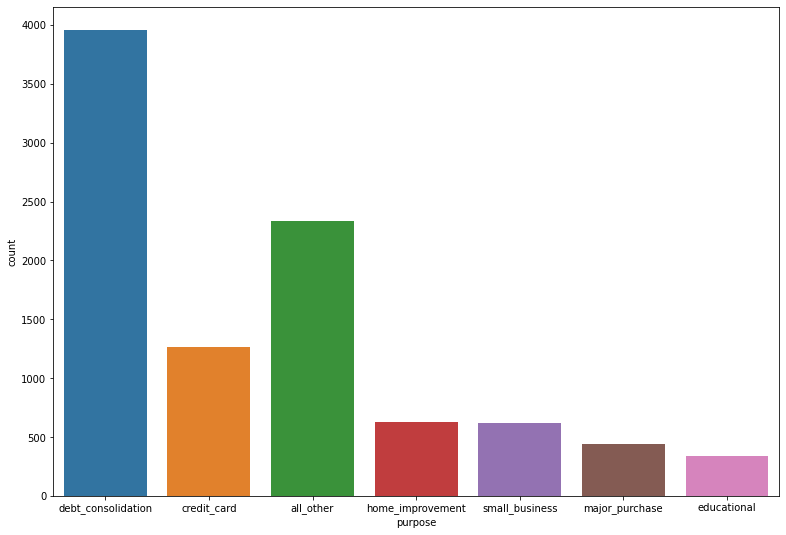

In [10]:
plt.figure (figsize=(13,9))
sns.countplot(df['purpose'])
plt.show()

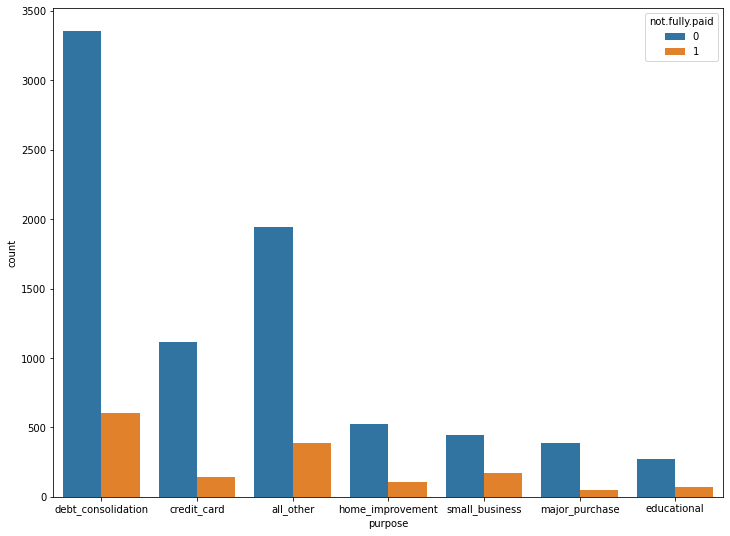

In [11]:
# purpose --not fully paid 
plt.figure(figsize=(12,9))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)
plt.show()

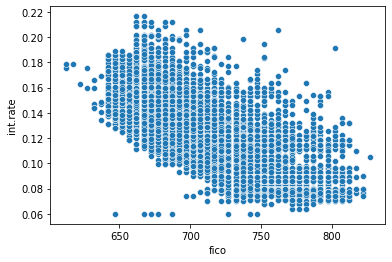

In [12]:
sns.scatterplot(x='fico',y='int.rate',data=df)
plt.show()

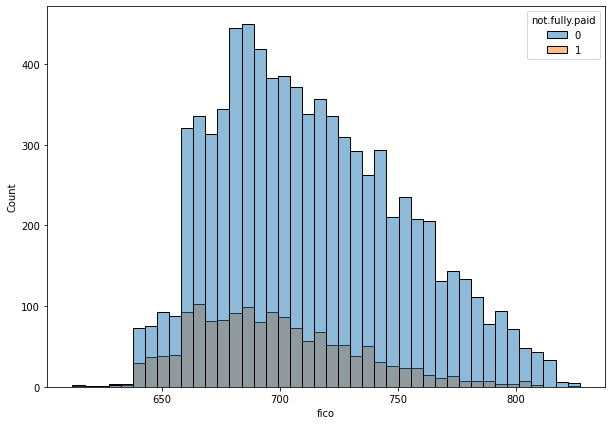

In [13]:
plt.figure(figsize=(10,7))
sns.histplot(x='fico',hue='not.fully.paid',data=df)
plt.show()

## Feature Transformation

## Transform categorical values into numerical values (discrete)


In [14]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [15]:
not_fully_paid_0=df[df['not.fully.paid']==0]
not_fully_paid_1=df[df['not.fully.paid']==1]

In [16]:
# resample
from sklearn.utils import resample
df_minor_upsample=resample(not_fully_paid_1,replace=True,n_samples=8045)

In [17]:
new_df=pd.concat([not_fully_paid_0,df_minor_upsample])

In [18]:
# shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [19]:
new_df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [20]:
new_df.shape

(16090, 14)

In [21]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [22]:
# convert purpose into numerical data
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [23]:
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [24]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8782,0,0,0.1412,119.83,10.714418,10.19,657,3210.000000,9771,86.4,4,0,0,0
3492,1,2,0.1221,666.30,11.184421,14.63,727,4320.000000,28585,60.8,0,0,0,1
3821,1,0,0.1095,163.57,11.603680,15.75,717,4680.000000,34267,67.5,2,0,0,0
8257,0,2,0.1103,818.83,12.323856,12.66,712,4409.000000,242194,56.0,0,0,0,1
4877,1,0,0.1600,98.45,10.416191,14.77,662,1319.958333,339,12.1,2,0,0,1


## Additional Feature Engineering 

In [25]:
new_df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.009097,-0.288040,0.051985,0.023310,-0.107404,0.372500,0.101963,-0.183294,-0.095301,-0.543335,-0.059199,-0.062898,-0.194886
purpose,0.009097,1.000000,0.155618,0.198676,0.108969,-0.038988,0.064936,0.060905,0.065036,-0.071921,0.049193,0.003047,0.008493,0.062390
int.rate,-0.288040,0.155618,1.000000,0.278762,0.088776,0.213374,-0.679289,-0.096354,0.087130,0.417074,0.183889,0.151028,0.106161,0.205697
installment,0.051985,0.198676,0.278762,1.000000,0.470014,0.032384,0.109998,0.187717,0.244774,0.059197,-0.016854,0.000810,-0.027508,0.069890
log.annual.inc,0.023310,0.108969,0.088776,0.470014,1.000000,-0.027590,0.105770,0.342234,0.372457,0.078417,0.036594,0.021930,0.024055,-0.041026
dti,-0.107404,-0.038988,0.213374,0.032384,-0.027590,1.000000,-0.222464,0.093253,0.160022,0.326170,0.030055,-0.033153,0.019376,0.058015
fico,0.372500,0.064936,-0.679289,0.109998,0.105770,-0.222464,1.000000,0.263120,0.009329,-0.500435,-0.188686,-0.210431,-0.155474,-0.199179
days.with.cr.line,0.101963,0.060905,-0.096354,0.187717,0.342234,0.093253,0.263120,1.000000,0.251895,0.014484,-0.031736,0.071191,0.061456,-0.041605
revol.bal,-0.183294,0.065036,0.087130,0.244774,0.372457,0.160022,0.009329,0.251895,1.000000,0.161268,0.042036,-0.030257,-0.030296,0.059934
revol.util,-0.095301,-0.071921,0.417074,0.059197,0.078417,0.326170,-0.500435,0.014484,0.161268,1.000000,-0.032231,-0.040760,0.074139,0.106028


<AxesSubplot:>

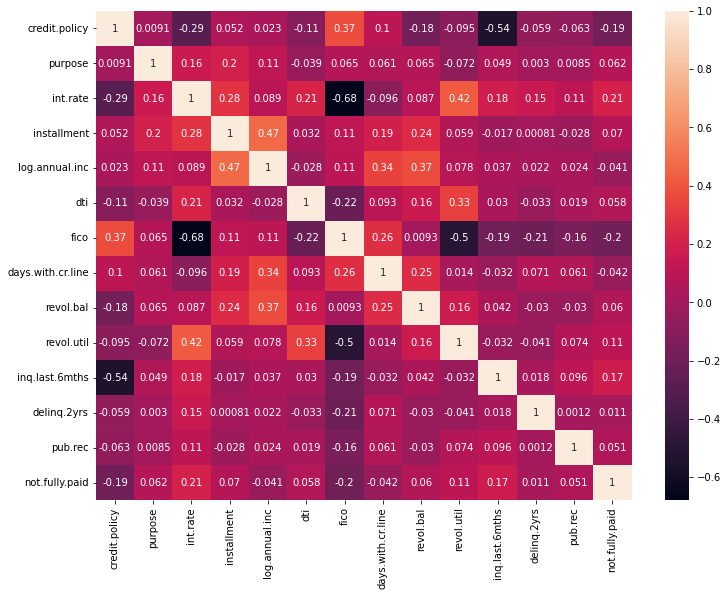

In [26]:
plt.figure(figsize=(12,9))
sns.heatmap(new_df.corr(),annot=True)

In [27]:
# see the sorted corrleation result

new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.205697
fico                 0.199179
credit.policy        0.194886
inq.last.6mths       0.171867
revol.util           0.106028
installment          0.069890
purpose              0.062390
revol.bal            0.059934
dti                  0.058015
pub.rec              0.050653
days.with.cr.line    0.041605
log.annual.inc       0.041026
delinq.2yrs          0.011340
Name: not.fully.paid, dtype: float64

In [28]:
# take columns with respect to corrleation
X=new_df[['credit.policy','purpose', 'int.rate', 'installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec']]

In [29]:
y=new_df['not.fully.paid']

In [30]:
# create a train test splt
from sklearn.model_selection import train_test_split


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [32]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [33]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
X_train.shape

(12872, 9)

In [35]:
X_test.shape

(3218, 9)

# Create a deep learning keras with tensorflow

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [37]:

# create the architecture
model=Sequential()
model.add(Dense(19,activation='relu',input_shape=[9]))
model.add(Dropout(0.20))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.20))

# output layer
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [39]:
#compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
early_stop =EarlyStopping( monitor='val_loss',min_delta=0.001,mode='min',patience=10,verbose=1) 

In [41]:
history=model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
51/51 [==============================] - 1s 4ms/step - loss: 0.7168 - accuracy: 0.5332 - val_loss: 0.6653 - val_accuracy: 0.5914
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5761 - val_loss: 0.6578 - val_accuracy: 0.6022
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5754 - val_loss: 0.6554 - val_accuracy: 0.6109
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5851 - val_loss: 0.6536 - val_accuracy: 0.6085
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5852 - val_loss: 0.6529 - val_accuracy: 0.6085
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5938 - val_loss: 0.6519 - val_accuracy: 0.6122
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.5958 - val_loss: 0.6511 - val_accuracy: 0.6103
Epoch 8/50
51/51 [==

In [42]:
history

In [43]:
history=model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6149 - val_loss: 0.6425 - val_accuracy: 0.6196
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6179 - val_loss: 0.6425 - val_accuracy: 0.6184
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6127 - val_loss: 0.6430 - val_accuracy: 0.6181
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6202 - val_loss: 0.6423 - val_accuracy: 0.6193
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6133 - val_loss: 0.6430 - val_accuracy: 0.6193
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6187 - val_loss: 0.6426 - val_accuracy: 0.6147
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6161 - val_loss: 0.6422 - val_accuracy: 0.6165
Epoch 8/50
51/51 [==

In [44]:
model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 828us/step - loss: 0.6394 - accuracy: 0.6215


[0.6394385695457458, 0.6215040683746338]

In [45]:
y_pred=model.predict(X_test)

In [46]:
y_pred

array([[0.49597514],
       [0.6011866 ],
       [0.36741394],
       ...,
       [0.4140299 ],
       [0.6708174 ],
       [0.6873083 ]], dtype=float32)

In [47]:

predictions=(y_pred>0.5).astype('int')

In [48]:
predictions

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [49]:
y_test

201     1
5025    1
4066    1
8642    0
7866    1
       ..
8580    1
9340    1
6737    0
9071    1
9021    1
Name: not.fully.paid, Length: 3218, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(predictions,y_test)

0.6215040397762586

In [51]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1659
           1       0.61      0.63      0.62      1559

    accuracy                           0.62      3218
   macro avg       0.62      0.62      0.62      3218
weighted avg       0.62      0.62      0.62      3218



In [52]:
model.save('loan_default1.h5')

In [53]:
# batch Normalization
from tensorflow.keras.layers import BatchNormalization

In [54]:

# create the architecture model2
# First ANN layer
model1=Sequential()
model1.add(Dense(128,activation='relu',input_shape=[9]))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# Second ANN layer
model1.add(Dense(64,activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))
           

# third ANN layer
model1.add(Dense(32,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.20))

# output layer
model1.add(Dense(1,activation='sigmoid'))

In [55]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [56]:
# compile the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
history=model1.fit(X_train,y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/100
51/51 [==============================] - 1s 10ms/step - loss: 0.7692 - accuracy: 0.5635 - val_loss: 0.6613 - val_accuracy: 0.5970
Epoch 2/100
51/51 [==============================] - 0s 4ms/step - loss: 0.7133 - accuracy: 0.5794 - val_loss: 0.6523 - val_accuracy: 0.6106
Epoch 3/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5883 - val_loss: 0.6472 - val_accuracy: 0.6134
Epoch 4/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.5999 - val_loss: 0.6439 - val_accuracy: 0.6165
Epoch 5/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.6015 - val_loss: 0.6395 - val_accuracy: 0.6212
Epoch 6/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.6071 - val_loss: 0.6388 - val_accuracy: 0.6271
Epoch 7/100
51/51 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.6101 - val_loss: 0.6368 - val_accuracy: 0.6249
Epoch 8/100


In [58]:
model1.evaluate(X_test,y_test)

101/101 [==============================] - 0s 941us/step - loss: 0.5569 - accuracy: 0.7172


[0.5568888187408447, 0.7172156572341919]

In [59]:
model1.evaluate(X_train,y_train)

403/403 [==============================] - 0s 936us/step - loss: 0.4978 - accuracy: 0.7685


[0.4978392720222473, 0.7684897184371948]

# Hyperparameter tuning in keras

In [60]:
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [61]:
import keras_tuner
import tensorflow

In [62]:

def build_model(hp):
    model=Sequential()
    
    # first hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
                      
        
    # Second hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
    # third hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
    
    model.add(Dense(1,activation='sigmoid'))
    
    learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)
        
    model.compile(loss='binary_crossentropy',
                  optimizer=tensorflow.keras.optimizers.Adam(learning_rate),
                 metrics=['accuracy'])
    return model

In [63]:
import keras_tuner as kt

In [64]:
build_model(kt.HyperParameters())

In [65]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=10                   
                      )

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [66]:
rtuner.search(X_train,y_train,
             epochs=50,validation_data=(X_test,y_test),
             verbose=2)

INFO:tensorflow:Oracle triggered exit


In [68]:
models=rtuner.get_best_models()

In [69]:
len(models)

1

In [70]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 416)               4160      
                                                                 
 batch_normalization (BatchN  (None, 416)              1664      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 416)               0         
                                                                 
 dense_1 (Dense)             (None, 416)               173472    
                                                                 
 batch_normalization_1 (Batc  (None, 416)              1664      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 416)               0

In [71]:
y_pred=models[0].predict(X_test)>=0.5


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7992541951522685